In [4]:
conda install scikit-learn

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importacion de las librerias importantes

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm


**ANALISIS EXPLORATORIO DE LOS DATOS**


In [6]:
import pandas as pd

df = pd.read_csv(
    r'/Users/davidsoteloseguin/Library/Mobile Documents/com~apple~CloudDocs/Personal/Formacion /Bootcamp/Bootcamp KC/Deep_Learning/DeepLearning/Proyecto/poi_dataset.csv'
)

In [7]:

df.T #DF traspuesto con .T

,0,1,2,3,4,5,6,7,8,9,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
id,4b36a3ed-3b28-4bc7-b975-1d48b586db03,e32b3603-a94f-49df-8b31-92445a86377c,0123a69b-13ac-4b65-a5d5-71a95560cff5,390d7d9e-e972-451c-b5e4-f494af15e788,023fc1bf-a1cd-4b9f-af78-48792ab1a294,bcd58127-76bd-44e7-84d8-cc25b46c7962,f45b1b38-36cd-4479-bac1-544ca6b1e685,ca8d89fa-3e9e-4639-ac01-7f83c5d0130e,0089bb20-c132-496c-b215-1986fcfa9d4b,297257de-a00a-4e99-bd21-b3a2c529e916,...,c5c29bd8-c3bc-4405-82ed-7d17d89238ae,4f0f97a5-aa50-4f27-b26c-72909626fb7a,2f3f2208-0682-4ebb-98be-79155ea07783,2d399e39-055a-4469-b2ef-06cfa4345560,6722f309-c1e8-446a-bcec-ff4d8b448923,a1058fc5-8b4e-43db-8758-2a4197eb69ca,77df8476-484e-436e-8977-f957f6b9371a,21c741f5-cbe7-4ae0-a69d-b5c1622056af,4b8b38fa-78b5-4ea8-a676-1de4e2b48caa,d7f45b8d-c311-4309-a85a-d91f1fcd3b2f
name,Galería Fran Reus,Convento de San Plácido,Instituto Geológico y Minero de España,Margarita Gil Roësset,Museo del Traje. Centro de Investigación del P...,Clara Campoamor,Plaza de la Encarnación,Atentado en 1985,Cuesta de los ciegos,Fragmento de la muralla árabe de Madrid,...,Sin datos,Portada,Asilo de nombres usados,"Curiosidades, datos y pormenores de la villa d...",El viaducto,"Plaza de Puerta Cerrada, en Madrid",¡Aquel Madrid!,El viento se acuesta al atardecer,Edificio Metrópolis por Herreros,Monasterio de Moreruela
shortDescription,La Galería Fran Reus es un espacio dedicado a ...,"El Convento de San Plácido en Madrid, fundado ...","El Instituto Geológico y Minero de España, sit...","Margarita Gil Roësset, escultora y poetisa esp...","El Museo del Traje de Madrid, fundado en 2004,...","Clara Campoamor fue una abogada, escritora y p...",Debe su nombre al desaparecido convento de la ...,1985. ETA asesina en Madrid al coronel auditor...,La Cuesta de los Ciegos es una escalera empedr...,Este vestigio de la muralla árabe del siglo IX...,...,"BARAHONA (José Barahona Marco)\nSin datos, ca....","JOSÉ MARÍA PICÓ LÓPEZ\nPortada\nABC, núm. 13.9...",JUAN ESPLANDIÚ PEÑA\nAsilo de nombres usados\n...,"JUAN ESPLANDIÚ PEÑA\nCuriosidades, datos y por...",JOSÉ FRANCISCO AGUIRRE PÉREZ\nEl viaducto\nBla...,"ANTONIO ORBEGOZO\nPlaza de Puerta Cerrada, en ...","JUAN ESPLANDIÚ PEÑA\n¡Aquel Madrid!\nABC, núm....",SERNY (Ricardo Summers e Isern)\nEl viento se ...,HERREROS (Enrique García-Herreros Codesido)\nS...,"Descubre el Monasterio de Moreruela, una joya ..."
categories,"['Escultura', 'Pintura']","['Patrimonio', 'Historia']","['Ciencia', 'Patrimonio']",['Cultura'],"['Patrimonio', 'Cultura']","['Historia', 'Cultura']","['Historia', 'Arquitectura']",['Historia'],"['Arquitectura', 'Historia']","['Arquitectura', 'Patrimonio']",...,['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],"['Patrimonio', 'Historia', 'Arquitectura']"
tier,1,1,2,1,1,1,2,3,3,2,...,1,1,1,1,1,1,1,1,1,1
locationLon,2.642262,-3.704467,-3.699694,-3.691228,-3.727822,-3.690211,-5.992007,-3.677161,-3.714567,-3.714546,...,-3.688483,-3.703395,-3.690199,-3.704049,-3.715019,-3.707943,-3.68912,-3.712121,-3.695836,-5.7776
locationLat,39.572694,40.423037,40.442045,40.427256,40.439665,40.435082,37.392953,40.4358,40.412984,40.414866,...,40.420718,40.417073,40.409594,40.417024,40.413979,40.413677,40.416555,40.419088,40.418698,41.812321
tags,[],[],[],[],[],[],[],[],[],[],...,"['Constructivismo', 'cartel']","['Nochevieja', 'ABC', 'Periodismo', 'portada']","['César González-Ruano', 'Juan Esplandiú Peña'...",['Puerta del sol'],"['Viaducto', 'Puente']",['Cruz'],"['Puerta', 'Parque del Retiro']","['Estatuas', 'Plaza']","['Alcalá', 'Gran Vía', 'Metrópolis']","['Arquitectura', 'Cisterciense', 'Císter', 'Mo..."
xps,500,500,250,500,500,500,250,100,150,250,...,600,600,600,600,600,600,600,600,600,500
Visits,10009,10010,10015,10011,10020,10019,10013,10019,10007,10018,...,10009,10010,10009,10012,10005,10014,10013,10005,10006,10011


In [8]:
df.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1.541109,-1.132337,39.900141,750.382409,10011.943276,3623.908222,2526.305927,973.261950
std,0.637677,22.733401,9.662134,228.319854,5.456808,4817.879374,2225.543360,1453.333948
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725292,40.411754,600.000000,10008.000000,464.000000,937.000000,116.000000
50%,1.000000,-3.699140,40.421738,700.000000,10011.000000,1434.000000,2718.000000,306.000000
75%,2.000000,-3.673348,40.472458,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000
max,4.000000,158.333118,65.706572,1000.000000,10038.000000,26425.000000,10999.000000,8157.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


In [10]:
df.name[0]

'Galería Fran Reus'

In [11]:
type(df.categories[0])

str

In [12]:
#Conversion a list de las strings de Tags, EVAL pasa por cada valor de la columna para convertirla en una list
df["tags"]=df["tags"].apply(eval)

In [ ]:
#Es necesario convertir a lista las columnas de categories & tags , convertimos a list de verdad por que si son string no podemos tokenizar.Es normal que cuando se genera el CSV pase a string este tipo de campo
df["categories"] = df["categories"].apply(eval)


In [14]:
#Comprobacion de que son list despues de la transformacion
type(df.categories[0])
type(df.tags[0])

list

In [15]:
#Evaluacion de campos vacios , diferente de nulos.Hacemos un analisis por distribucion de valores
df.tags.apply(len).value_counts()

tags
10    473
13    466
1     136
0     107
4     102
12     88
5      58
3      56
6      33
2      24
7      10
8       8
11      6
9       2
Name: count, dtype: int64

In [16]:
tag_counts = df['tags'].apply(len)

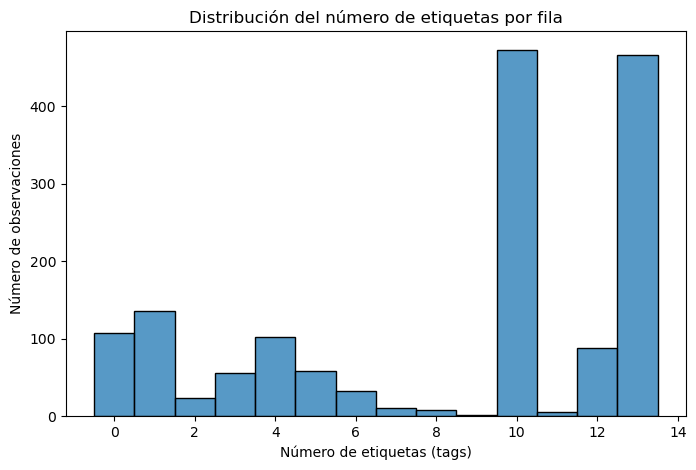

In [17]:

#Distribucion grafica de frecuencia de la longitud de tags
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(tag_counts, bins=range(tag_counts.max() + 2), discrete=True)
plt.title('Distribución del número de etiquetas por fila')
plt.xlabel('Número de etiquetas (tags)')
plt.ylabel('Número de observaciones')
plt.show()

In [18]:
# Obtener el conjunto de tags únicos
tags_unicos = set(tag for lista in df['tags'] for tag in lista)

# Mostrar los tags únicos (ordenados) y su número total
tags_ordenados = sorted(tags_unicos)
print("Tags únicos:")
print(tags_ordenados)

print(f"\nNúmero total de tags únicos: {len(tags_unicos)}")

Tags únicos:
['11-m', '1898', '1976', '1985', '1986', '1988', '2003', 'A Coruña', 'A Estrada', 'A Guarda', 'A Merca', 'A Veiga', 'ABC', 'Abandonados', 'Abandono', 'Abastecimiento de agua', 'Abrantes', 'Abstracción', 'Abstracción geométrica', 'Abuelos', 'Acacias', 'Academia', 'Academia de Bellas Artes', 'Academia de bellas artes', 'Acantilados', 'Accesibilidad', 'Acceso', 'Acceso peatonal', 'Accidente', 'Acero inoxidable', 'Acero oxidado', 'Acero y bronce', 'Activismo', 'Activo', 'Acuario', 'Acueducto', 'Acústica', 'Adaptabilidad', 'Adaptación', 'Adaptación urbana', 'Administración', 'Administración pública', 'Adolfo Alsina', 'Aeronáutica', 'Aeropuerto', 'Aeródromo', 'Aeródromos', 'Agricultura', 'Agripina', 'Agua', 'Aguas limpias', 'Aguas minerales', 'Aguas sulfurosas', 'Aguas termales', 'Aguja', 'Agujero', 'Agustín ibarrola', 'Agustín lara', 'Agustín querol', 'Aire libre', 'Aislamiento', 'Ajardinamiento', 'Alameda de osuna', 'Albergue', 'Alberto sánchez', 'Albigenses', 'Alcalde', 'Alca

In [ ]:

df['num_tags'] = df['tags'].apply(len)

In [20]:
#Comprobacion de que esta correctamente generada la nueva variable
frecuencia_num_tags = df['num_tags'].value_counts().sort_index()
print(frecuencia_num_tags)

num_tags
0     107
1     136
2      24
3      56
4     102
5      58
6      33
7      10
8       8
9       2
10    473
11      6
12     88
13    466
Name: count, dtype: int64


In [21]:
#dropamos la columna original de tags
df.drop(columns=['tags'], inplace=True)

In [22]:
df.categories.apply(len).value_counts()

categories
3    1073
4     325
2     106
1      63
0       2
Name: count, dtype: int64

In [23]:
from collections import Counter

# Aplanar todas las listas de categorías y contarlas
frecuencia_categorias = Counter(cat for sublist in df['categories'] for cat in sublist)

# Mostrar todas las categorías con su frecuencia
for categoria, freq in frecuencia_categorias.most_common():
    print(f"{categoria}: {freq}")

Historia: 1297
Cultura: 1030
Arquitectura: 660
Patrimonio: 603
Escultura: 482
Misterio: 382
Ciencia: 132
Ocio: 76
Pintura: 48
Naturaleza: 43
Cine: 23
Gastronomía: 18


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
#Dividir en columnas la variable categorica empleando ONEHOTENCODING

mlb = MultiLabelBinarizer()

one_hot_cat = mlb.fit_transform(df['categories'])


"\ndf_encoded = pd.DataFrame(mlb.fit_transform(df['categories']), columns=mlb.classes_)\ndf_encoded.head()\nset(cat for cats in df['categories'] for cat in cats)._len_()\n"

In [26]:
#Evaluamos que este correcto el one_hot
one_hot_cat.shape

(1569, 12)

In [27]:
#Concatenamos las diferentes categorias como features por el OneHoot con el Dataset original

df =pd.concat([df, pd.DataFrame(one_hot_cat, columns=mlb.classes_)], axis=1)

In [28]:
#dropamos la columna original de categorias
df.drop(columns=['categories'], inplace=True)

In [29]:
df.head()

,id,name,shortDescription,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,...,Cine,Cultura,Escultura,Gastronomía,Historia,Misterio,Naturaleza,Ocio,Patrimonio,Pintura
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,1,2.642262,39.572694,500,10009,422,3582,...,0,0,1,0,0,0,0,0,0,1
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...",1,-3.704467,40.423037,500,10010,7743,96,...,0,0,0,0,1,0,0,0,1,0
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...",2,-3.699694,40.442045,250,10015,3154,874,...,0,0,0,0,0,0,0,0,1,0
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",1,-3.691228,40.427256,500,10011,8559,79,...,0,1,0,0,0,0,0,0,0,0
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...",1,-3.727822,40.439665,500,10020,915,2896,...,0,1,0,0,0,0,0,0,1,0


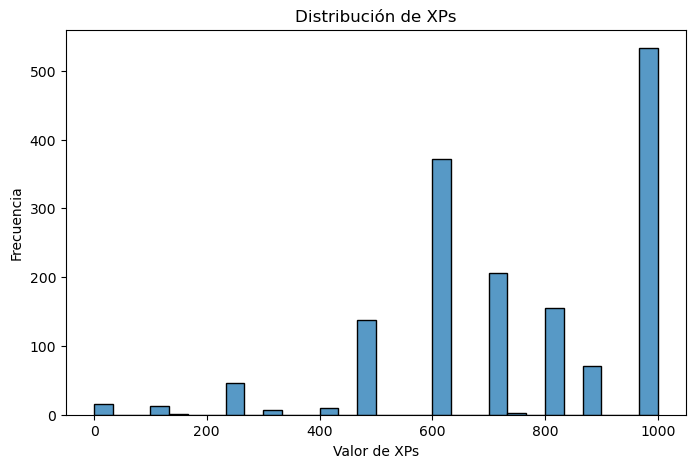

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['xps'], bins=30, kde=False)  # kde=True si quieres curva suavizada
plt.title('Distribución de XPs')
plt.xlabel('Valor de XPs')
plt.ylabel('Frecuencia')
plt.show()

In [31]:
#Analisis de frecuencia de la variable XPS
xps_freq = df['xps'].value_counts().sort_index()
print(xps_freq)

xps
0        16
100      13
150       1
250      46
300       7
400      10
500     137
600     372
700     206
750       2
800     155
900      71
1000    533
Name: count, dtype: int64


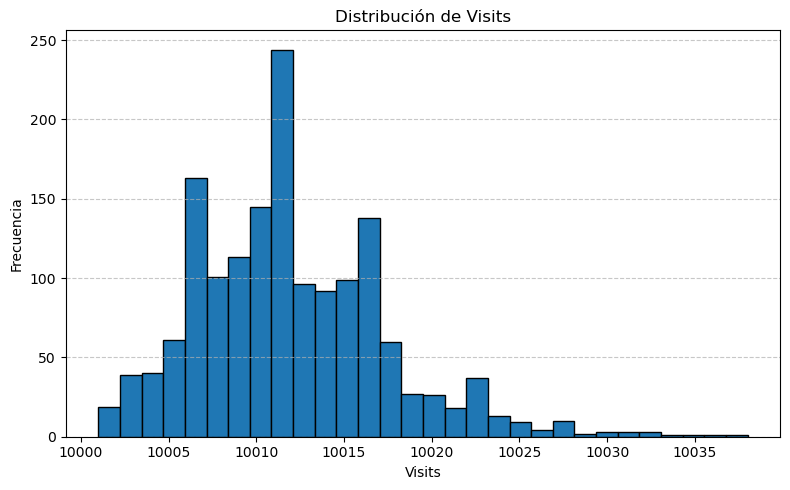

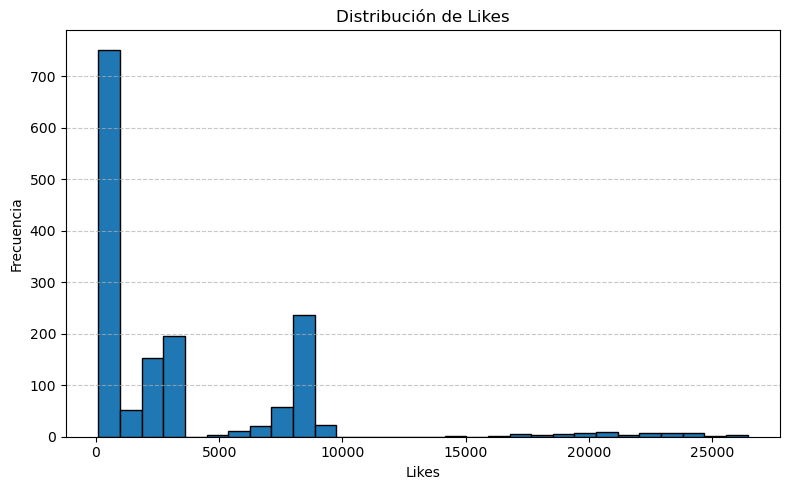

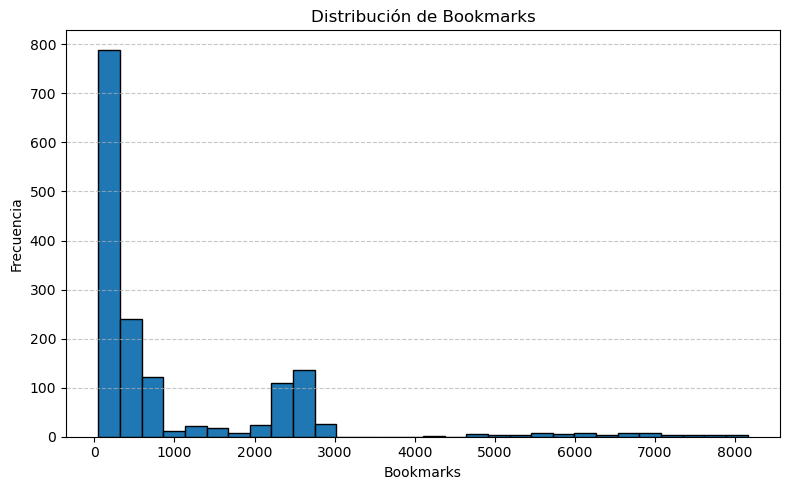

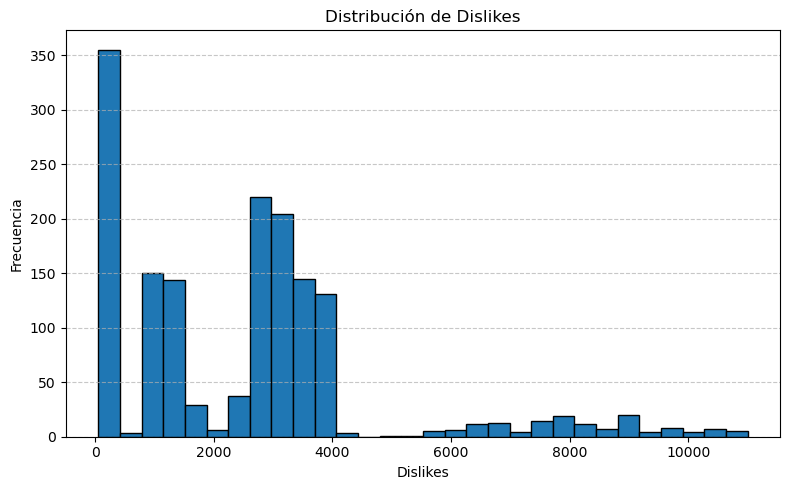

In [32]:
#Evaluamos el histograma de cada variable que empleamos para target
import matplotlib.pyplot as plt

variables = ['Visits', 'Likes', 'Bookmarks', 'Dislikes']

for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var], bins=30, edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

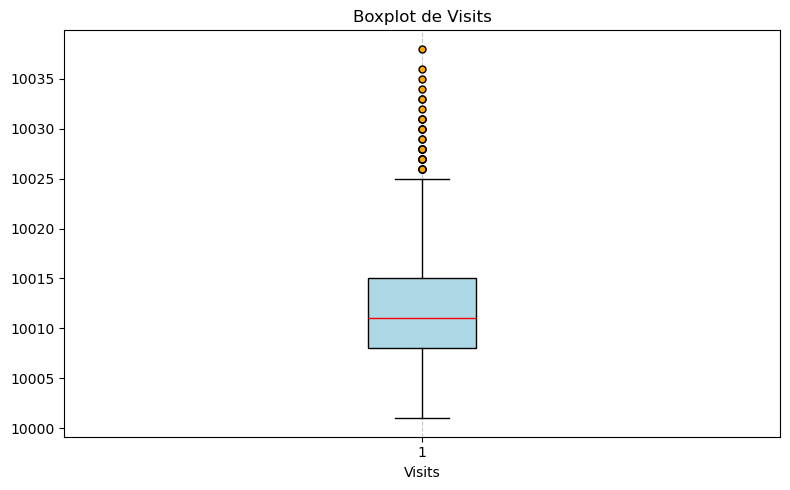

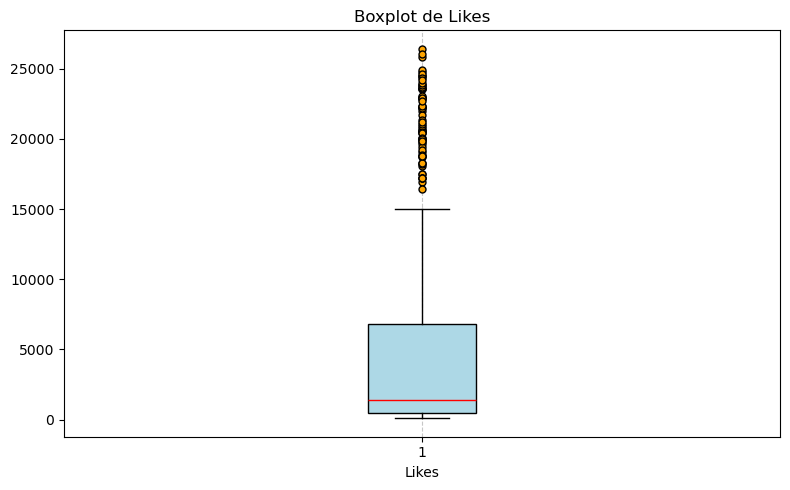

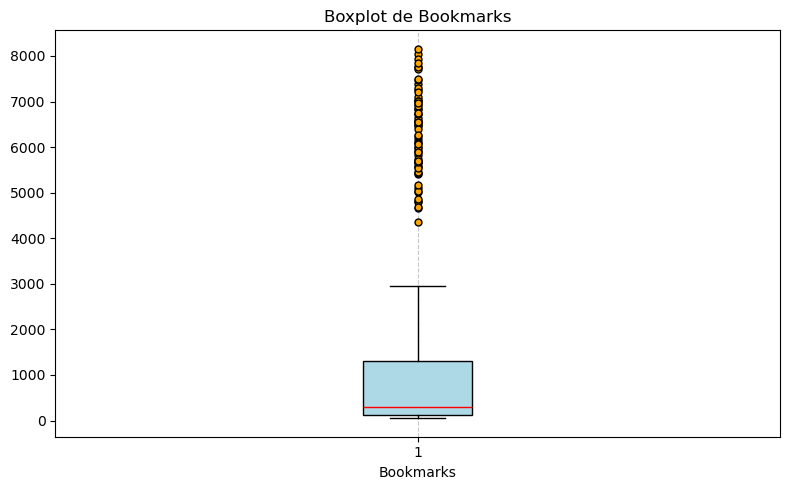

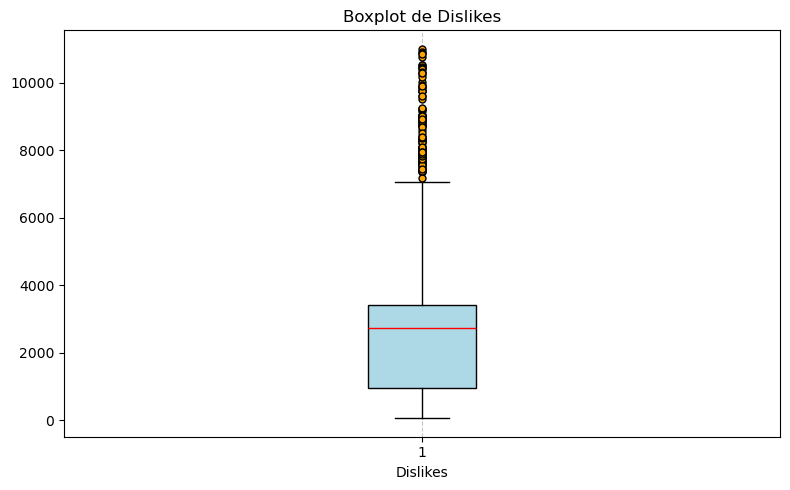

In [33]:
import matplotlib.pyplot as plt

variables = ['Visits', 'Likes', 'Bookmarks', 'Dislikes']

for var in variables:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[var], patch_artist=True,
                boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='red'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
#Empleamos Robust dado que existen muchos outliners , evitan que sean tan influyentes

# 1. Log-transform variables sesgadas
df['Likes_log'] = np.log1p(df['Likes'])
df['Bookmarks_log'] = np.log1p(df['Bookmarks'])
df['Dislikes_log'] = np.log1p(df['Dislikes'])

# 2. Escalado individual
scaler_visits = StandardScaler()
df['Visits_scaled'] = scaler_visits.fit_transform(df[['Visits']])

scaler_likes = RobustScaler()
df['Likes_scaled'] = scaler_likes.fit_transform(df[['Likes_log']])

scaler_bookmarks = RobustScaler()
df['Bookmarks_scaled'] = scaler_bookmarks.fit_transform(df[['Bookmarks_log']])

scaler_dislikes = RobustScaler()
df['Dislikes_scaled'] = scaler_dislikes.fit_transform(df[['Dislikes_log']])

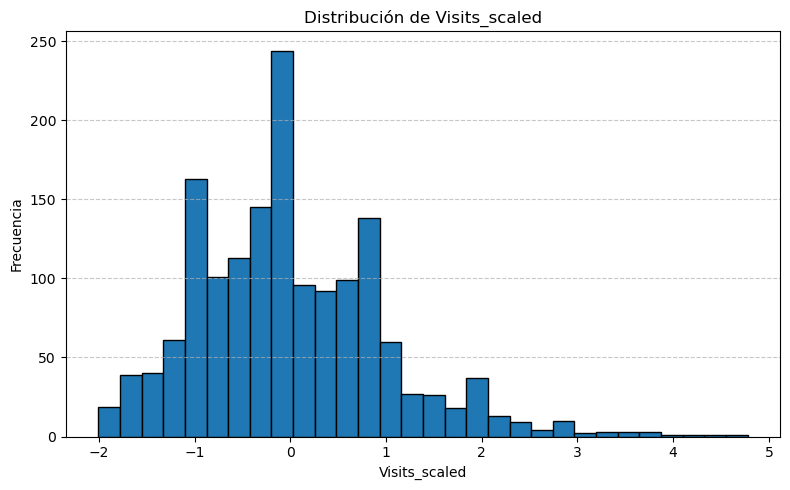

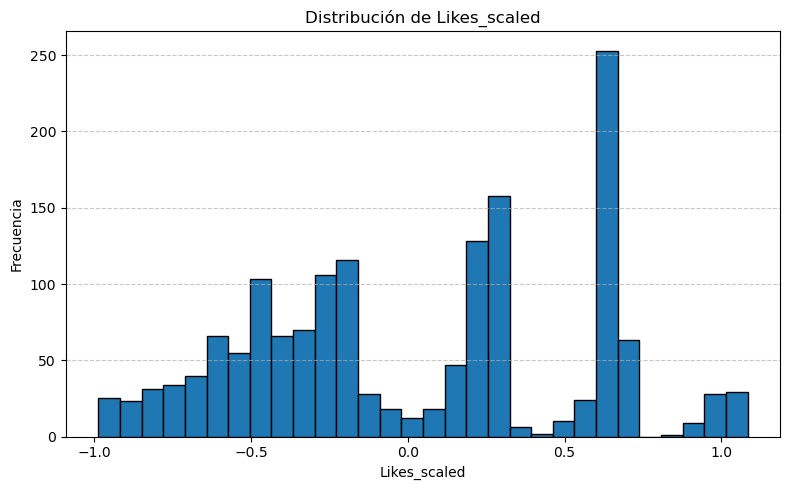

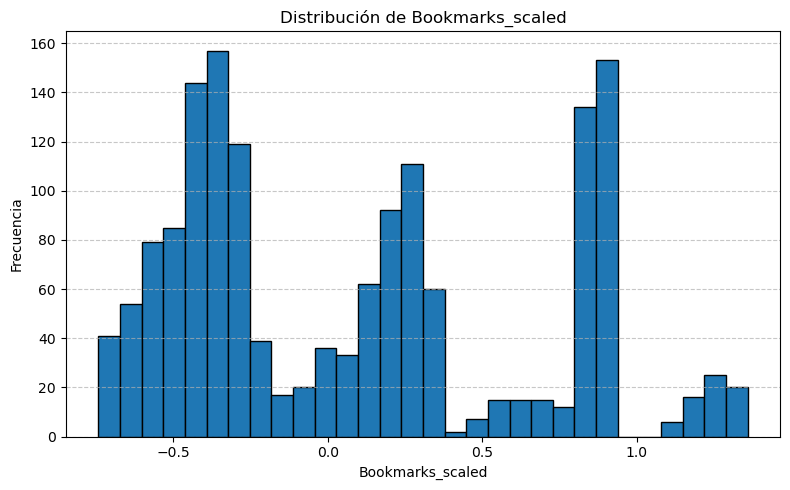

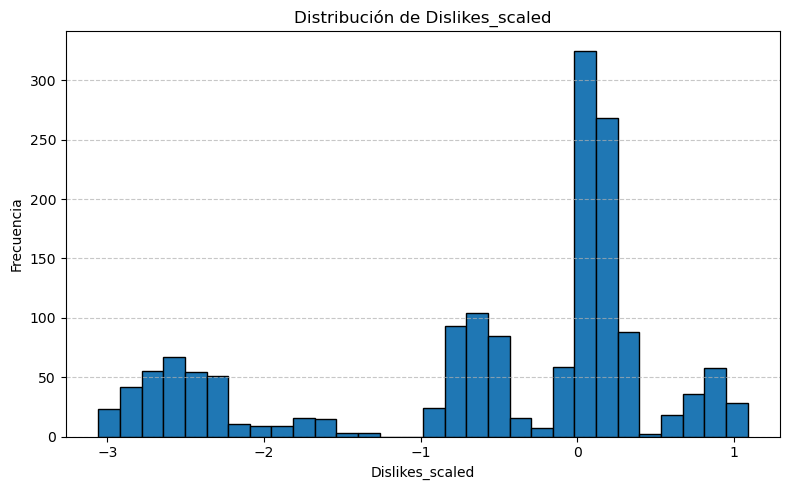

In [35]:
#Analizamos los histogramas despues del proceso de normalizacion
import matplotlib.pyplot as plt

variables = ['Visits_scaled', 'Likes_scaled', 'Bookmarks_scaled', 'Dislikes_scaled']

for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var], bins=30, edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
#Generacion de la variable objetivo, podriamos estudiar el ponderar mejor las variables para generar la objetivo
df.target = df["Visits_scaled"] + df ["Likes_scaled"] + df["Bookmarks_scaled"] - df["Dislikes_scaled"]

/var/folders/q0/q0klb_ms1x7c4w74c6q4gzzc0000gn/T/ipykernel_96079/4143968526.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df["Visits_scaled"] + df ["Likes_scaled"] + df["Bookmarks_scaled"] - df["Dislikes_scaled"]


In [37]:
print(df.target.describe())

count    1569.000000
mean        0.672156
std         2.292982
min        -3.494322
25%        -1.124473
50%         0.094538
75%         2.402721
max         8.625726
dtype: float64


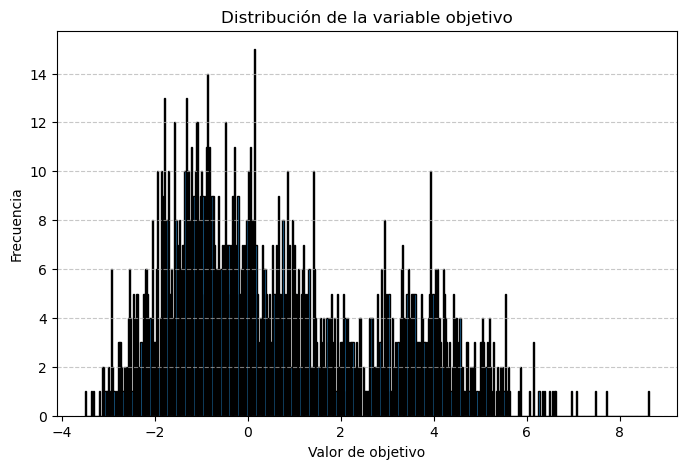

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df.target, bins=500, edgecolor='black')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Valor de objetivo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

#PRUEBA CON 3 CUTS

# Usamos qcut para dividir la columna 'target' en 3 clases con igual número de observaciones
df['pop_class'] = pd.qcut(df.target, q=3, labels=[0, 1, 2])
df['pop_class'] = df['pop_class'].astype(int)  # Aseguramos que sea tipo entero para clasificación


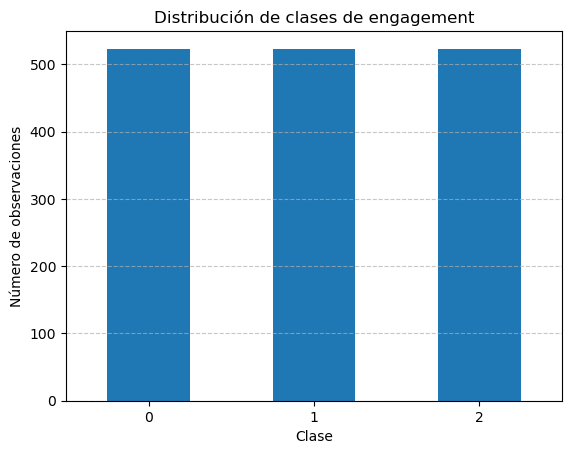

In [40]:
df['pop_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de clases de engagement')
plt.xlabel('Clase')
plt.ylabel('Número de observaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [41]:
df

,id,name,shortDescription,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,...,Patrimonio,Pintura,Likes_log,Bookmarks_log,Dislikes_log,Visits_scaled,Likes_scaled,Bookmarks_scaled,Dislikes_scaled,pop_class
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,1,2.642262,39.572694,500,10009,422,3582,...,0,1,6.047372,4.369448,8.183956,-0.539549,-0.454335,-0.561929,0.214273,0
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...",1,-3.704467,40.423037,500,10010,7743,96,...,1,0,8.954674,7.932721,4.574711,-0.356233,0.626988,0.913175,-2.588413,2
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...",2,-3.699694,40.442045,250,10015,3154,874,...,1,0,8.056744,6.390241,6.774224,0.560346,0.293018,0.274628,-0.880426,2
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",1,-3.691228,40.427256,500,10011,8559,79,...,0,0,9.054855,7.765993,4.382027,-0.172917,0.664249,0.844154,-2.738038,2
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...",1,-3.727822,40.439665,500,10020,915,2896,...,1,0,6.820016,4.969813,7.971431,1.476924,-0.166962,-0.313393,0.049241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,a1058fc5-8b4e-43db-8758-2a4197eb69ca,"Plaza de Puerta Cerrada, en Madrid","ANTONIO ORBEGOZO\nPlaza de Puerta Cerrada, en ...",1,-3.707943,40.413677,600,10014,8174,63,...,0,1,9.008836,7.673688,4.158883,0.377030,0.647133,0.805942,-2.911316,2
1565,77df8476-484e-436e-8977-f957f6b9371a,¡Aquel Madrid!,"JUAN ESPLANDIÚ PEÑA\n¡Aquel Madrid!\nABC, núm....",1,-3.689120,40.416555,600,10013,679,2963,...,0,1,6.522093,4.682131,7.994295,0.193714,-0.277770,-0.432486,0.066996,1
1566,21c741f5-cbe7-4ae0-a69d-b5c1622056af,El viento se acuesta al atardecer,SERNY (Ricardo Summers e Isern)\nEl viento se ...,1,-3.712121,40.419088,600,10005,926,2913,...,0,1,6.831954,5.198497,7.977282,-1.272812,-0.162523,-0.218724,0.053784,0
1567,4b8b38fa-78b5-4ea8-a676-1de4e2b48caa,Edificio Metrópolis por Herreros,HERREROS (Enrique García-Herreros Codesido)\nS...,1,-3.695836,40.418698,600,10006,4615,2797,...,0,1,8.437284,6.838405,7.936660,-1.089496,0.434554,0.460156,0.022240,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   tier              1569 non-null   int64  
 4   locationLon       1569 non-null   float64
 5   locationLat       1569 non-null   float64
 6   xps               1569 non-null   int64  
 7   Visits            1569 non-null   int64  
 8   Likes             1569 non-null   int64  
 9   Dislikes          1569 non-null   int64  
 10  Bookmarks         1569 non-null   int64  
 11  main_image_path   1569 non-null   object 
 12  num_tags          1569 non-null   int64  
 13  Arquitectura      1569 non-null   int64  
 14  Ciencia           1569 non-null   int64  
 15  Cine              1569 non-null   int64  
 16  Cultura           1569 non-null   int64  


In [ ]:
#Dropeamos columnas no relevantes por ser string
df.drop(columns=['shortDescription','id','name'], inplace=True)

In [ ]:
#Dropeamos columnas no relevantes por ser string
df.drop(columns=['Likes', 'Bookmarks', 'Dislikes'], inplace=True)

In [ ]:
#ropeamos columnas no relevantes por ser string
df.drop(columns=['Likes_log', 'Bookmarks_log', 'Dislikes_log'], inplace=True)

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tier              1569 non-null   int64  
 1   locationLon       1569 non-null   float64
 2   locationLat       1569 non-null   float64
 3   xps               1569 non-null   int64  
 4   Visits            1569 non-null   int64  
 5   main_image_path   1569 non-null   object 
 6   num_tags          1569 non-null   int64  
 7   Arquitectura      1569 non-null   int64  
 8   Ciencia           1569 non-null   int64  
 9   Cine              1569 non-null   int64  
 10  Cultura           1569 non-null   int64  
 11  Escultura         1569 non-null   int64  
 12  Gastronomía       1569 non-null   int64  
 13  Historia          1569 non-null   int64  
 14  Misterio          1569 non-null   int64  
 15  Naturaleza        1569 non-null   int64  
 16  Ocio              1569 non-null   int64  


In [47]:
#MODIFICACION 110625 : transformacion a FLOAT64
# Columnas que no queremos convertir
exclude_cols = ['main_image_path', 'pop_class']

# Seleccionar columnas int64 excluyendo las no deseadas
int_cols_to_convert = [
    col for col in df.select_dtypes(include='int64').columns
    if col not in exclude_cols
]

# Convertir esas columnas a float64
df[int_cols_to_convert] = df[int_cols_to_convert].astype('float64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tier              1569 non-null   float64
 1   locationLon       1569 non-null   float64
 2   locationLat       1569 non-null   float64
 3   xps               1569 non-null   float64
 4   Visits            1569 non-null   float64
 5   main_image_path   1569 non-null   object 
 6   num_tags          1569 non-null   float64
 7   Arquitectura      1569 non-null   float64
 8   Ciencia           1569 non-null   float64
 9   Cine              1569 non-null   float64
 10  Cultura           1569 non-null   float64
 11  Escultura         1569 non-null   float64
 12  Gastronomía       1569 non-null   float64
 13  Historia          1569 non-null   float64
 14  Misterio          1569 non-null   float64
 15  Naturaleza        1569 non-null   float64
 16  Ocio              1569 non-null   float64


In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [50]:
df.main_image_path

0       data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1       data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2       data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3       data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4       data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...
                              ...                        
1564    data_main/a1058fc5-8b4e-43db-8758-2a4197eb69ca...
1565    data_main/77df8476-484e-436e-8977-f957f6b9371a...
1566    data_main/21c741f5-cbe7-4ae0-a69d-b5c1622056af...
1567    data_main/4b8b38fa-78b5-4ea8-a676-1de4e2b48caa...
1568    data_main/d7f45b8d-c311-4309-a85a-d91f1fcd3b2f...
Name: main_image_path, Length: 1569, dtype: object

In [51]:
import os
print(df.main_image_path[0])
print(os.path.exists(df.main_image_path[0]))

data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03/main.jpg
True


In [52]:
import os
print("Directorio actual:", os.getcwd())

Directorio actual: /Users/davidsoteloseguin/Library/Mobile Documents/com~apple~CloudDocs/Personal/Formacion /Bootcamp/Bootcamp KC/mlops/Practiva


In [53]:
import cv2

img = cv2.imread(df.main_image_path[0])
if img is not None:
    print("Tamaño de imagen:", img.shape)
else:
    print("No se pudo leer la imagen.")

Tamaño de imagen: (128, 128, 3)


In [54]:
cv2.imread(df.main_image_path[0]).shape

(128, 128, 3)

In [55]:
import random

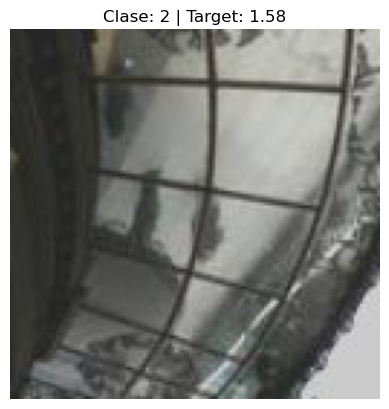

In [56]:
idx = random.randint(0, len(df) - 1)
img = cv2.imread(df.main_image_path.iloc[idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Clase: {df.pop_class.iloc[idx]} | Target: {df.target.iloc[idx]:.2f}")
plt.axis('off')
plt.show()

In [ ]:
#Hacemos una comprobacion del shape , tipo y valores del array
import cv2
import numpy as np

# Cargar la imagen
img = cv2.imread(df.main_image_path.iloc[7])  # o cualquier índice
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #conversion correcta del color RGB en vez de BGR

# Imprimir valores del array
print("Forma:", img_rgb.shape)     
print("Tipo:", img_rgb.dtype)     
print("Valores de los píxeles (RGB):")
print(img_rgb)                     

Forma: (128, 128, 3)
Tipo: uint8
Valores de los píxeles (RGB):
[[[253 254 248]
  [246 246 238]
  [220 215 209]
  ...
  [172 160 122]
  [196 184 142]
  [199 191 145]]

 [[233 234 228]
  [237 236 231]
  [223 218 212]
  ...
  [174 160 123]
  [211 199 157]
  [227 216 171]]

 [[170 171 166]
  [199 198 193]
  [220 215 211]
  ...
  [195 179 143]
  [232 219 177]
  [250 237 193]]

 ...

 [[ 48  46  51]
  [ 34  32  37]
  [ 16  14  17]
  ...
  [ 46  51  57]
  [ 47  52  58]
  [ 46  51  57]]

 [[ 70  65  69]
  [ 51  49  52]
  [ 34  32  35]
  ...
  [ 46  51  57]
  [ 49  54  60]
  [ 50  55  61]]

 [[ 74  69  73]
  [ 58  53  57]
  [ 46  41  45]
  ...
  [ 47  51  60]
  [ 50  54  63]
  [ 52  56  65]]]


In [ ]:
from torchvision import transforms

# Transformación simple para pruebas
transform_temporal = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [59]:
#Creamos la instancia del dataset multimodal exlcuyendo las variables oportunas
from datasets_OHE import POIDataset

dataset = POIDataset(
    target = df.pop_class,
    image_paths = df.main_image_path,
    features = df.drop(columns=[
        "pop_class",          # objetivo
        "main_image_path",    # imagen
        "Visits_scaled",      # variables descartadas
        "Likes_scaled",
        "Bookmarks_scaled",
        "Dislikes_scaled",
         "Visits"
    ]).values,
    transform = transform_temporal  # se definirá más adelante
)

In [ ]:
#Hacemos el Split para dividir Train, Val y Test


from sklearn.model_selection import train_test_split

# 1. Primero separas el 10% para test
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['pop_class'],
    random_state=42
)

# 2. Luego divides el 90% restante en 78% train y 12% val
# 12% de 90% = 0.12 / 0.90 ≈ 0.1333
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.12 / 0.90,
    stratify=train_val_df['pop_class'],
    random_state=42
)

AQUI PODEMOS CREAR UN PIECHART PARA GRAFICAR LA DISTRIBUCION

In [ ]:
#Normalizamos algunas features de los metadatos, podriamos no hacerlo y mejorar los resultados ???
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['xps', 'num_tags']
scaler = StandardScaler()

# Modificamos solo copias de los splits para evitar riesgos de modificaciones erroneas
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()

# Ajuste del scaler solo con train
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])#Aqui esta fit de Train
val_df[cols_to_scale]   = scaler.transform(val_df[cols_to_scale])
test_df[cols_to_scale]  = scaler.transform(test_df[cols_to_scale])

In [62]:
#Hacemos un reseteo del indice de cada dataframe despues del split . Esto es debido a que self.image_paths es una pandas.Series con índices heredados del DataFrame original. Entonces, si val_df o test_df no fue reseteado con .reset_index(), los índices pueden estar desalineados, como por ejemplo:val_df.index = [975, 1056, 1048, 153, 557, ...]
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
#Hacemos las transformaciones sobre las imagenes , normalizamos por cada canal

#MODIFICACION 100625: AÑADIMOS ROTACION
from torchvision import transforms

def get_transforms(split='train', img_size=(224, 224)):
    if split == 'train':#Transformaciones de formato , brillo y data aumentation
        return transforms.Compose([
            transforms.Resize(img_size),
            transforms.ColorJitter(brightness=0.3, contrast=0.3),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(degrees=15),  
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
    else:#No hacemos el data aumentation
        return transforms.Compose([
            transforms.Resize(img_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

In [ ]:
#Adaptamos de nuevo quitando las features que no interesan
drop_cols = [
    "pop_class",          
    "main_image_path",  
    "Visits_scaled", "Likes_scaled", "Bookmarks_scaled", "Dislikes_scaled",
    "Visits"
]

# Extraer columnas que SÍ se usarán como metadatos. Estos metadatos son los que van a cada subconjunto, train , val y test
metadata_cols = df.drop(columns=drop_cols).columns.tolist()

In [65]:
#Hacemos pruebas para revisar que sean coherentes los resultados
print(type(train_df.pop_class))
print(type(val_df.pop_class))
print(train_df.pop_class.dtype)
print(val_df.pop_class.dtype)
print(val_df.pop_class.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
int64
int64
0    0
1    0
2    1
3    1
4    1
Name: pop_class, dtype: int64


In [ ]:
#Creamos los datasets para cada subconjunto train, val y test.
from datasets_OHE import POIDataset

train_dataset = POIDataset(
    target = train_df['pop_class'].values,
    image_paths = train_df['main_image_path'].values,
    features = train_df[metadata_cols].values,
    transform = get_transforms('train')
)

val_dataset = POIDataset(
    target = val_df['pop_class'].values,
    image_paths = val_df['main_image_path'].values,
    features = val_df[metadata_cols].values,
    transform = get_transforms('val')
)

test_dataset = POIDataset(
    target = test_df['pop_class'].values,
    image_paths = test_df['main_image_path'].values,
    features = test_df[metadata_cols].values,
    transform = get_transforms('val')
)


In [67]:
#Hacemos comprobaciones para validar los resultados de los datasets creados
print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))
print("Test size:", len(test_dataset))

Train size: 1223
Val size: 189
Test size: 157


In [ ]:
#Hacemos una comprobacion del shape, tipos de datos que tenemos en train
features, image, label = train_dataset[0]

print("Features shape:", features.shape)  
print("Image shape:", image.shape)         
print("Label:", label)                  
print("Label dtype:", label.dtype)         

Features shape: torch.Size([17])
Image shape: torch.Size([3, 224, 224])
Label: tensor(1)
Label dtype: torch.int64


In [ ]:
#Hacemos una prueba cargando en un dataloader
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

batch = next(iter(train_loader))
features_batch, images_batch, labels_batch = batch

print("Features batch:", features_batch.shape)   
print("Images batch:", images_batch.shape)       
print("Labels batch:", labels_batch.shape)       
print("Labels dtype:", labels_batch.dtype)      

Features batch: torch.Size([16, 17])
Images batch: torch.Size([16, 3, 224, 224])
Labels batch: torch.Size([16])
Labels dtype: torch.int64


In [83]:
from torch.utils.data import DataLoader

#CAMBIO 100625: Aplicamos una pequeña mejora para ser mas rapido en el entreno
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=7, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=7, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=7, pin_memory=True)

In [ ]:
#CAMBIO 1100625: Nueva Red con 4 capas en vez de 2 para los metadatos, incluyo dropout y batch normalization

import torch
import torch.nn as nn

class MultiModalNet(nn.Module):
    def __init__(self, n_features=17, n_classes=4, activation_function=nn.ReLU, dropout_p=0.3):
        super(MultiModalNet, self).__init__()
        self.activation = activation_function()

        # Rama de metadatos con 4 capas densas + BatchNorm + Dropout
        self.features_branch = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.BatchNorm1d(128),
            self.activation,
            nn.Dropout(dropout_p),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            self.activation,
            nn.Dropout(dropout_p),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            self.activation,
            nn.Dropout(dropout_p),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            self.activation
        )

        # Rama de imágenes (CNN básica) con BatchNorm2d y Dropout
        self.image_branch = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            self.activation,
            nn.MaxPool2d(2),
            nn.Dropout2d(dropout_p),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            self.activation,
            nn.MaxPool2d(2),
            nn.Dropout2d(dropout_p),

            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128),
            nn.BatchNorm1d(128),
            self.activation,
            nn.Dropout(dropout_p),

            nn.Linear(128, 32),
            nn.BatchNorm1d(32),
            self.activation
        )

        # Clasificador final (48 = 16 + 32)
        self.classifier = nn.Sequential(
            nn.Linear(48, 64),
            nn.BatchNorm1d(64),
            self.activation,
            nn.Dropout(dropout_p),
            nn.Linear(64, n_classes)
        )

    def forward(self, features, images):
        x_feat = self.features_branch(features)   
        x_img = self.image_branch(images)         
        x = torch.cat([x_feat, x_img], dim=1)     
        return self.classifier(x)                 



In [ ]:
#OJO : Codigo importante para el procesado con el equipo local MACBOOK PRO M1 

import torch.multiprocessing
torch.multiprocessing.set_start_method('spawn', force=True)

# Y en los DataLoaders:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)

In [86]:
#Hacemos una prueba cargando un batch de train_loader
features_batch, images_batch, labels_batch = next(iter(train_loader))

print("Features:", features_batch.shape)
print("Images:", images_batch.shape)
print("Labels:", labels_batch.shape)

Features: torch.Size([32, 17])
Images: torch.Size([32, 3, 224, 224])
Labels: torch.Size([32])


In [87]:
#Creamos una instancia del modelo
model = MultiModalNet(n_features=features_batch.shape[1], n_classes=4)

In [88]:
#Pasar el batch por el modelo
output = model(features_batch, images_batch)

In [89]:
#Comprobamos tipos de datos
print("Output dtype:", output.dtype)
print("Labels dtype:", labels_batch.dtype)

Output dtype: torch.float32
Labels dtype: torch.int64


In [90]:
#Comprobamos la funcion de perdida
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(output, labels_batch)
print("Loss:", loss.item())

Loss: 1.5727311372756958


In [91]:
#Comprobamos si hace backpropagation
loss.backward()
print("Gradientes ok ")

Gradientes ok 


In [ ]:
#Entrenamiento con la integracion en MLFLow

import time
import torch
import torch.nn as nn
import torch.optim as optim
import mlflow
import mlflow.pytorch
from sklearn.metrics import classification_report
from tqdm import tqdm
from datasets_OHE import POIDataset

#  Entrenamiento por época 
def train_epoch(model, device, dataloader, criterion, optimizer, scheduler=None, l1_lambda=0.0, l2_lambda=0.0):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for features, images, labels in dataloader:
        features, images, labels = features.to(device), images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(features, images)
        loss = criterion(outputs, labels)

        # Regularización L1
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss += l1_lambda * l1_norm

        loss.backward()
        optimizer.step()

        if scheduler:
            scheduler.step()

        running_loss += loss.item() * labels.size(0)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / total
    accuracy = 100.0 * correct / total
    current_lr = optimizer.param_groups[0]['lr']
    return avg_loss, accuracy, current_lr

# Evaluación 
def eval_epoch(model, device, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for features, images, labels in dataloader:
            features, images, labels = features.to(device), images.to(device), labels.to(device)
            outputs = model(features, images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / total
    accuracy = 100.0 * correct / total
    return avg_loss, accuracy

# Predicción final 
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for features, images, labels in dataloader:
            features, images = features.to(device), images.to(device)
            outputs = model(features, images)
            preds = torch.argmax(outputs, dim=1).cpu().tolist()
            all_preds.extend(preds)
            all_labels.extend(labels.tolist())

    return all_preds, all_labels

# Entrenamiento completo 
def train_network_decay_fn_act(model_class, activation_function, train_loader, val_loader, test_loader,
                               device, learning_rate=1e-3, num_epochs=20,
                               l1_lambda=0.0, l2_lambda=1e-4):

    with mlflow.start_run():
        # Hiperparámetros
        mlflow.log_param("model_class", model_class.__name__)
        mlflow.log_param("activation_function", activation_function.__name__)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("num_epochs", num_epochs)
        mlflow.log_param("l1_lambda", l1_lambda)
        mlflow.log_param("l2_lambda", l2_lambda)
        mlflow.log_param("device", str(device))

        print(f"[INFO]: Usando dispositivo: {device}")
        print(f"[INFO]: Func. activación: {activation_function}")
        print(f"[INFO]: Learning rate: {learning_rate}")
        print(f"[INFO]: Regularización L1: {l1_lambda}, L2: {l2_lambda}")
        print(f"[INFO]: Nº de epochs: {num_epochs}")

        model = model_class(activation_function=activation_function).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        scheduler = None

        train_losses, val_losses = [], []
        train_accs, val_accs = [], []
        lrs = []

        # Temporizador de entrenamiento
        start_train = time.time()

        pbar = tqdm(range(num_epochs), desc='Training', unit='epoch')
        for epoch in pbar:
            train_loss, train_acc, lr = train_epoch(model, device, train_loader, criterion,
                                                    optimizer, scheduler, l1_lambda, l2_lambda)
            val_loss, val_acc = eval_epoch(model, device, val_loader, criterion)

            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            lrs.append(lr)

            # Log por epoch
            mlflow.log_metric("train_loss", train_loss, step=epoch)
            mlflow.log_metric("val_loss", val_loss, step=epoch)
            mlflow.log_metric("train_acc", train_acc, step=epoch)
            mlflow.log_metric("val_acc", val_acc, step=epoch)
            mlflow.log_metric("lr", lr, step=epoch)

            pbar.set_postfix({
                'train_loss': f'{train_loss:.4f}',
                'train_acc': f'{train_acc:.2f}%',
                'val_loss': f'{val_loss:.4f}',
                'val_acc': f'{val_acc:.2f}%',
                'lr': f'{lr:.6f}'
            })

        end_train = time.time()
        mlflow.log_metric("train_duration_secs", end_train - start_train)
        mlflow.log_metric("train_duration_mins", (end_train - start_train) / 60)

        # Evaluación
        start_eval = time.time()
        all_preds, all_targets = evaluate_model(model, test_loader, device)
        end_eval = time.time()

        test_acc = 100 * sum(p == t for p, t in zip(all_preds, all_targets)) / len(all_targets)
        mlflow.log_metric("test_acc", test_acc)
        mlflow.log_metric("eval_duration_secs", end_eval - start_eval)
        mlflow.log_metric("eval_duration_mins", (end_eval - start_eval) / 60)

        print(f"[INFO]: Test Accuracy: {test_acc:.4f}")
        print(classification_report(all_targets, all_preds, zero_division=1))

        # Log del modelo entrenado
        mlflow.pytorch.log_model(model, "model")

        # Visualización
        plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc)
        plot_learning_rate(lrs, num_epochs)

        return model

In [ ]:
#Cambio 110625: integracion de graficas para valorar la evolucion
import matplotlib.pyplot as plt
from datasets_OHE import POIDataset

# Loss & Accuracy por epoch 
def plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc):
    epochs = range(1, num_epochs + 1)
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Pérdidas
    ax1.plot(epochs, train_losses, label='Train Loss', linestyle='-', marker='o')
    ax1.plot(epochs, val_losses, label='Val Loss', linestyle='--', marker='x')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss & Accuracy (Test Acc: {test_acc:.2f}%)')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Precisión
    ax2 = ax1.twinx()
    ax2.plot(epochs, train_accs, label='Train Acc', linestyle='-', marker='s', color='green')
    ax2.plot(epochs, val_accs, label='Val Acc', linestyle='--', marker='d', color='orange')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Evolución del Learning Rate
def plot_learning_rate(lrs, num_epochs):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, num_epochs + 1), lrs, marker='o')
    plt.title('Learning Rate por Época')
    plt.xlabel('Época')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loss de entrenamiento en escala logarítmica
def plot_loss_logscale(train_losses):
    plt.figure(figsize=(8, 4))
    plt.semilogy(train_losses, label='Train Loss (log scale)', marker='o')
    plt.title('Pérdida durante el entrenamiento (escala logarítmica)')
    plt.xlabel('Época')
    plt.ylabel('Loss (log scale)')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [81]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


[INFO]: Usando dispositivo: cpu
[INFO]: Func. activación: <class 'torch.nn.modules.activation.LeakyReLU'>
[INFO]: Learning rate: 0.001
[INFO]: Regularización L1: 1e-05, L2: 0.0001
[INFO]: Nº de epochs: 20


Training: 100%|██████████| 20/20 [07:10<00:00, 21.52s/epoch, train_loss=1.1138, train_acc=62.31%, val_loss=0.6836, val_acc=70.90%, lr=0.001000]
2025/07/05 19:08:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[INFO]: Test Accuracy: 62.4204
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        52
           1       0.45      0.44      0.45        52
           2       0.71      0.79      0.75        53

    accuracy                           0.62       157
   macro avg       0.62      0.62      0.62       157
weighted avg       0.62      0.62      0.62       157



2025/07/05 19:08:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


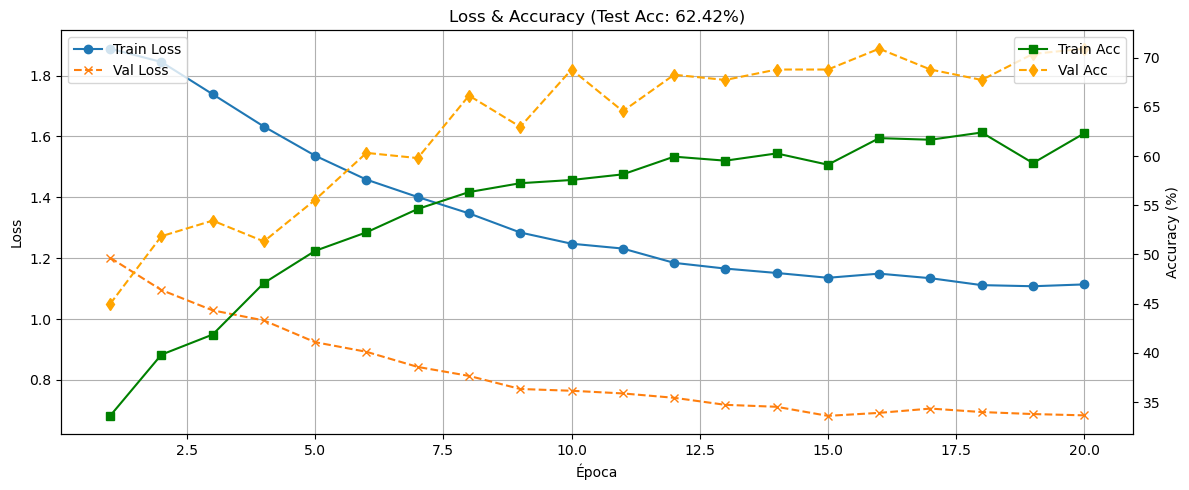

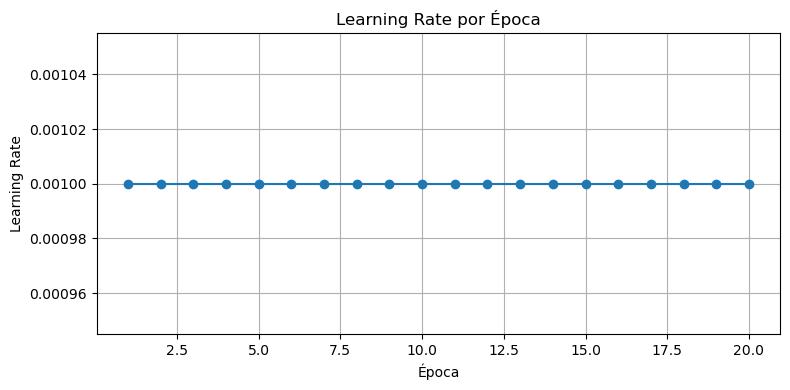

In [ ]:

#  Define los hiperparámetros antes
model_class = MultiModalNet #Aqui hay que cambiar 
activation_function = nn.LeakyReLU
learning_rate = 1e-3
num_epochs = 20
l1_lambda = 1e-5
l2_lambda = 1e-4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Lanza el entrenamiento con esas variables
model = train_network_decay_fn_act(
    model_class=model_class,
    activation_function=activation_function,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    device=device,
    learning_rate=learning_rate,
    num_epochs=num_epochs,
    l1_lambda=l1_lambda,
    l2_lambda=l2_lambda
)




In [ ]:
#Este bloque recoge directamente las metricas del modelo entrenado 

from sklearn.metrics import accuracy_score
model.eval()

def get_accuracy(model, dataloader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, images, labels in dataloader:
            features, images = features.to(device), images.to(device)
            outputs = model(features, images)
            preds = torch.argmax(outputs, dim=1).cpu()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())
    return accuracy_score(all_labels, all_preds) * 100

accuracy_train = get_accuracy(model, train_loader)
accuracy_test = get_accuracy(model, test_loader)


total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
# Crea el nombre del experimento automáticamente
run_name = f"POI_OHE_{model_class.__name__}_LR{learning_rate}_Act{activation_function.__name__}"
print("Nombre generado para el run:", run_name)

Nombre generado para el run: POI_OHE_MultiModalNet_LR0.001_ActLeakyReLU


In [ ]:
mlflow.set_experiment("POI_OHE")
with mlflow.start_run(run_name=run_name):
# Hiperparámetros ya definidos previamente
    mlflow.log_param("model_class", model_class.__name__)
    mlflow.log_param("activation_function", activation_function.__name__)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("l1_lambda", l1_lambda)
    mlflow.log_param("l2_lambda", l2_lambda)
    mlflow.log_param("device", str(device))

    # Info del modelo
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    mlflow.log_param("total_parameters", total_params)
    mlflow.log_param("trainable_parameters", trainable_params)

    # Info del dataset
    mlflow.log_param("train_size", len(train_loader.dataset))
    mlflow.log_param("val_size", len(val_loader.dataset))
    mlflow.log_param("test_size", len(test_loader.dataset))
    mlflow.log_param("batch_size", train_loader.batch_size)

    # Métricas de precisión (calculadas tras entreno)
    accuracy_train = get_accuracy(model, train_loader)
    accuracy_test = get_accuracy(model, test_loader)
    mlflow.log_metric("Accuracy Train", accuracy_train)
    mlflow.log_metric("Accuracy Test", accuracy_test)

    # Registro del modelo
    mlflow.pytorch.log_model(model, name="model") #Con este codigo subimos los datos al modelo en MLFLow





2025/07/05 19:10:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [160]:
print("accuracy_train:", accuracy_train, "tipo:", type(accuracy_train))
print("accuracy_test:", accuracy_test, "tipo:", type(accuracy_test))

accuracy_train: 63.85936222403925 tipo: <class 'float'>
accuracy_test: 59.87261146496815 tipo: <class 'float'>


In [ ]:
#POdemos ver el RUN ID 

import mlflow

mlflow.set_experiment("POI_OHE")
run_name = f"POI_OHE_{model_class.__name__}_LR{learning_rate}_Act{activation_function.__name__}"

with mlflow.start_run(run_name=run_name):
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID generado: {run_id}")  

Run ID generado: 24777ee0c32b4b899202b5b54076818b


In [157]:
print(type(version), version)

<class 'int'> 2


In [158]:
print(type(model_name), model_name)

<class 'str'> POI_OHE


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

model_name = "POI_OHE"
version = 2  
stage = "Production"

client.transition_model_version_stage(
    name=model_name,
    version=version,
    stage=stage,
    archive_existing_versions=True
)

/var/folders/q0/q0klb_ms1x7c4w74c6q4gzzc0000gn/T/ipykernel_75397/290195901.py:9: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


RepresenterError: ('cannot represent an object', <Metric: dataset_digest=None, dataset_name=None, key='Accuracy Train', model_id='m-4eabfdef5f1d492fbebf1f167c1d5202', run_id='73d5a6331628418db3edb80d01fec9dc', step=0, timestamp=1751702124436, value=61.48814390842191>)